In [1]:
import os

In [2]:
os.chdir("C:\\Users\\kunal\\OneDrive\\Desktop\\Linear_Regression_Python")

In [3]:
os.getcwd()

'C:\\Users\\kunal\\OneDrive\\Desktop\\Linear_Regression_Python'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Boston_Jan_2022_Kunal.ipynb',
 'Categorical vars.png',
 'Cat_Corr_heatmap.png',
 'chapter9_Carnegie_Melon_University.pdf',
 'Corr_heatmap.png',
 'Delhi_hom_price.csv',
 'Flats_Price_SGD.csv',
 'lecture3_MIT.pdf',
 'Linear Regression with SGD- March 2021_March-Copy2.ipynb',
 'Linear Regression with SGD- March 2021_March.ipynb',
 'Linear Regression with SGD- Updated March 2022.ipynb',
 'Linear Regression with Stochastic Gradient Descent org.ipynb',
 'Linear Regression with Stochastic Gradient Descent_org.ipynb',
 'Linear Regression.pptx',
 'Linear_Regression_May_2021_Kunal.ipynb',
 'Linear_Regression_Property Price Prediction _April_2022-Copy1.ipynb',
 'Linear_Regression_Property Price Prediction _April_2022-Final.ipynb',
 'Linear_Regression_Property Price Prediction _April_2022.ipynb',
 'Mar_30_2022 Linear regression.ipynb',
 'MCQs on Linear Regression.docx',
 'missing data.png',
 'PCA_Property_price_dataset_April_2022.ipynb',
 'Problem Statement.docx',
 'Proper

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df_train=pd.read_csv("Property_Price_Train.csv")
df_test=pd.read_csv('Property_Price_Test.csv')

In [8]:
df_train.shape

(1459, 81)

In [9]:
df_train.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [10]:
df_train.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_test.shape

(1459, 80)

In [12]:
df_test['Sale_Price']=np.nan;df_test.head(50)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
5,1466,60,RLD,75.0,10194.721200,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN
6,1467,20,RLD,NaN,15033.338140,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,NaN
7,1468,60,RLD,63.0,12975.123110,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,NaN
8,1469,20,RLD,85.0,22272.588650,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,NaN
9,1470,20,RLD,70.0,11464.167120,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,NaN


In [13]:
combined_df=df_train.append(df_test);combined_df.shape

(2918, 81)

In [14]:
combined_df.Basement_Height.value_counts() #basement height is categorical---correct ..no need to change

TA    1282
Gd    1209
Ex     258
Fa      88
Name: Basement_Height, dtype: int64

In [15]:
#check the structure of the dataset uding the info command

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         2918 non-null   int64  
 1   Building_Class             2918 non-null   int64  
 2   Zoning_Class               2914 non-null   object 
 3   Lot_Extent                 2432 non-null   float64
 4   Lot_Size                   2918 non-null   float64
 5   Road_Type                  2918 non-null   object 
 6   Lane_Type                  198 non-null    object 
 7   Property_Shape             2918 non-null   object 
 8   Land_Outline               2918 non-null   object 
 9   Utility_Type               2916 non-null   object 
 10  Lot_Configuration          2918 non-null   object 
 11  Property_Slope             2918 non-null   object 
 12  Neighborhood               2918 non-null   object 
 13  Condition1                 2918 non-null   objec

In [16]:
combined_df=combined_df.drop('Id',axis=1)
combined_df=combined_df.drop('Month_Sold',axis=1)
combined_df=combined_df.drop('Garage_Built_Year',axis=1)
combined_df=combined_df.drop('Garage_Finish_Year',axis=1)

In [17]:

combined_df['Zoning_Class']=combined_df['Zoning_Class'].astype('object')
combined_df['Building_Class']=combined_df['Building_Class'].astype('object')
combined_df['Overall_Material']=combined_df['Overall_Material'].astype('object')
#Changing the datatype of building class


combined_df['Overall_Material']=combined_df['Overall_Material'].astype('object')
combined_df['House_Condition']=combined_df['House_Condition'].astype('object')


In [18]:
#check for missing values

(combined_df.isnull().sum()/combined_df.shape[0]>.45).value_counts()

False    71
True      6
dtype: int64

In [19]:
combined_df.isnull().sum()/combined_df.shape[0]>.45

Building_Class         False
Zoning_Class           False
Lot_Extent             False
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Year_Sold              False
Sale_Type              False
Sale_Condition         False
Sale_Price              True
Length: 77, dtype: bool

In [20]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
combined_df.isnull().sum()/combined_df.shape[0]>.45

Building_Class         False
Zoning_Class           False
Lot_Extent             False
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Year_Sold              False
Sale_Type              False
Sale_Condition         False
Sale_Price              True
Length: 77, dtype: bool

In [21]:
combined_df=combined_df.drop(['Lane_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],
                             axis=1);combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             2918 non-null   object 
 1   Zoning_Class               2914 non-null   object 
 2   Lot_Extent                 2432 non-null   float64
 3   Lot_Size                   2918 non-null   float64
 4   Road_Type                  2918 non-null   object 
 5   Property_Shape             2918 non-null   object 
 6   Land_Outline               2918 non-null   object 
 7   Utility_Type               2916 non-null   object 
 8   Lot_Configuration          2918 non-null   object 
 9   Property_Slope             2918 non-null   object 
 10  Neighborhood               2918 non-null   object 
 11  Condition1                 2918 non-null   object 
 12  Condition2                 2918 non-null   object 
 13  House_Type                 2918 non-null   objec

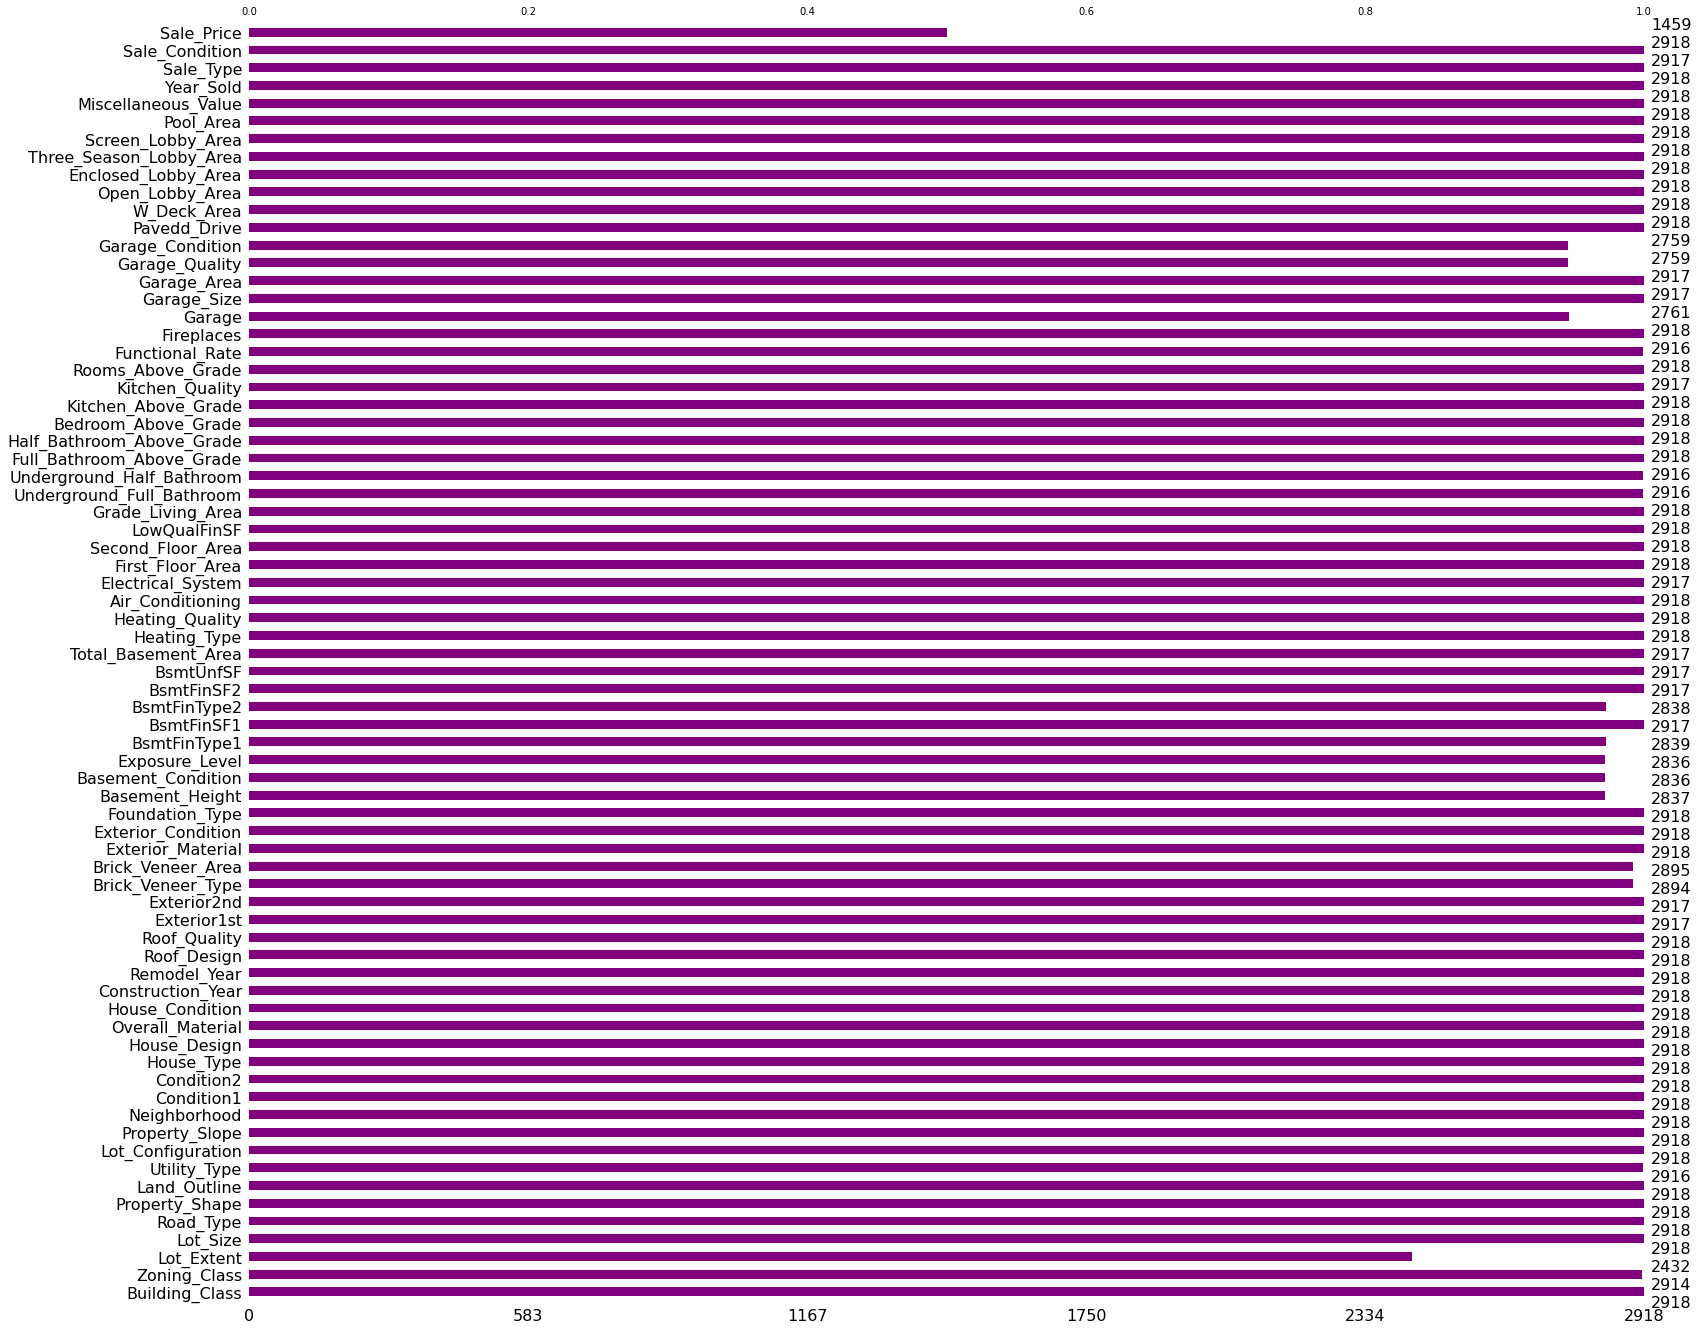

In [22]:
#!pip install missingno

import missingno as msno

msno.bar(combined_df,color="purple");plt.show()

# Imputation for dataset combined_df (Numerical Variables)
#Segregating the numeric variables and categorical variables

Examine the numerical and categorical features in the dataset

In [23]:
df_num_var = combined_df.select_dtypes(include=np.number)

df_num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lot_Extent                 2432 non-null   float64
 1   Lot_Size                   2918 non-null   float64
 2   Construction_Year          2918 non-null   int64  
 3   Remodel_Year               2918 non-null   int64  
 4   Brick_Veneer_Area          2895 non-null   float64
 5   BsmtFinSF1                 2917 non-null   float64
 6   BsmtFinSF2                 2917 non-null   float64
 7   BsmtUnfSF                  2917 non-null   float64
 8   Total_Basement_Area        2917 non-null   float64
 9   First_Floor_Area           2918 non-null   int64  
 10  Second_Floor_Area          2918 non-null   int64  
 11  LowQualFinSF               2918 non-null   int64  
 12  Grade_Living_Area          2918 non-null   int64  
 13  Underground_Full_Bathroom  2916 non-null   float

In [24]:
#df_num_var['Year_Sold']  #Retained as numeric 

df_num_var.isnull().sum().sort_values(ascending=False)
#df_num_var.isnull().sum()

Sale_Price                   1459
Lot_Extent                    486
Brick_Veneer_Area              23
Underground_Full_Bathroom       2
Underground_Half_Bathroom       2
Garage_Area                     1
BsmtFinSF1                      1
BsmtFinSF2                      1
BsmtUnfSF                       1
Total_Basement_Area             1
Garage_Size                     1
Three_Season_Lobby_Area         0
W_Deck_Area                     0
Open_Lobby_Area                 0
Enclosed_Lobby_Area             0
Construction_Year               0
Screen_Lobby_Area               0
Miscellaneous_Value             0
Year_Sold                       0
Pool_Area                       0
Bedroom_Above_Grade             0
Fireplaces                      0
Rooms_Above_Grade               0
Kitchen_Above_Grade             0
Remodel_Year                    0
Lot_Size                        0
Full_Bathroom_Above_Grade       0
Grade_Living_Area               0
LowQualFinSF                    0
Second_Floor_A

In [25]:
#Missing value treatment for numerical features

df_num_var=df_num_var.fillna(df_num_var.median())
df_num_var.head()

,Lot_Extent,Lot_Size,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Year_Sold,Sale_Price
0,65.0,8450.0,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2008,208500.0
1,80.0,9600.0,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,196.316304,198.900074,74.716033,15.039392,0,0,0,0,2007,181500.0
2,68.0,11250.0,2001,2002,162.0,486.0,0.0,434.0,920.0,920,...,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,2008,223500.0
3,60.0,9550.0,1915,1970,0.0,216.0,0.0,540.0,756.0,961,...,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2006,140000.0
4,84.0,14260.0,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,...,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,2008,250000.0


In [26]:

df_num_var.isnull().sum().sort_values(ascending=True)

Lot_Extent                   0
Miscellaneous_Value          0
Pool_Area                    0
Screen_Lobby_Area            0
Three_Season_Lobby_Area      0
Enclosed_Lobby_Area          0
Open_Lobby_Area              0
W_Deck_Area                  0
Garage_Area                  0
Garage_Size                  0
Fireplaces                   0
Rooms_Above_Grade            0
Kitchen_Above_Grade          0
Bedroom_Above_Grade          0
Half_Bathroom_Above_Grade    0
Full_Bathroom_Above_Grade    0
Underground_Half_Bathroom    0
Underground_Full_Bathroom    0
Grade_Living_Area            0
LowQualFinSF                 0
Second_Floor_Area            0
First_Floor_Area             0
Total_Basement_Area          0
BsmtUnfSF                    0
BsmtFinSF2                   0
BsmtFinSF1                   0
Brick_Veneer_Area            0
Remodel_Year                 0
Construction_Year            0
Lot_Size                     0
Year_Sold                    0
Sale_Price                   0
dtype: i

In [27]:
df_num_var.isnull().sum()#all imputed

Lot_Extent                   0
Lot_Size                     0
Construction_Year            0
Remodel_Year                 0
Brick_Veneer_Area            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtUnfSF                    0
Total_Basement_Area          0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Grade_Living_Area            0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Full_Bathroom_Above_Grade    0
Half_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Above_Grade          0
Rooms_Above_Grade            0
Fireplaces                   0
Garage_Size                  0
Garage_Area                  0
W_Deck_Area                  0
Open_Lobby_Area              0
Enclosed_Lobby_Area          0
Three_Season_Lobby_Area      0
Screen_Lobby_Area            0
Pool_Area                    0
Miscellaneous_Value          0
Year_Sold                    0
Sale_Price                   0
dtype: i

# Imputation for dataset combined (Catgeorical Variables)
#Segregating the numeric variables and categorical variables

Examine the numerical and categorical features in the dataset

In [28]:
df_cat_var = combined_df.select_dtypes(include='object')

df_cat_var.head()

,Building_Class,Zoning_Class,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,...,Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Garage,Garage_Quality,Garage_Condition,Pavedd_Drive,Sale_Type,Sale_Condition
0,60,RLD,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,...,Y,SBrkr,Gd,TF,Attchd,TA,TA,Y,WD,Normal
1,20,RLD,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,...,Y,SBrkr,TA,TF,Attchd,TA,TA,Y,WD,Normal
2,60,RLD,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,...,Y,SBrkr,Gd,TF,Attchd,TA,TA,Y,WD,Normal
3,70,RLD,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,...,Y,SBrkr,Gd,TF,Detchd,TA,TA,Y,WD,Abnorml
4,60,RLD,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,...,Y,SBrkr,Gd,TF,Attchd,TA,TA,Y,WD,Normal


In [29]:
#Missing value treatment for numerical features



##Doesnt work for all the variables in the catgeorical data

#df_cat_var=df_cat_var.fillna(df_cat_var.mode())
#df_cat_var.head()

In [30]:
#check ofr missing value in df_num_var and  df_cat_var

#df_num_var.isnull().sum()
df_cat_var.isnull().sum().sort_values(ascending=False)

Garage_Condition      159
Garage_Quality        159
Garage                157
Basement_Condition     82
Exposure_Level         82
Basement_Height        81
BsmtFinType2           80
BsmtFinType1           79
Brick_Veneer_Type      24
Zoning_Class            4
Utility_Type            2
Functional_Rate         2
Sale_Type               1
Exterior1st             1
Kitchen_Quality         1
Electrical_System       1
Exterior2nd             1
Building_Class          0
Heating_Type            0
Heating_Quality         0
Pavedd_Drive            0
Air_Conditioning        0
Exterior_Material       0
Foundation_Type         0
Condition1              0
Road_Type               0
Property_Shape          0
Land_Outline            0
Lot_Configuration       0
Property_Slope          0
Neighborhood            0
Condition2              0
Exterior_Condition      0
House_Type              0
House_Design            0
Overall_Material        0
House_Condition         0
Roof_Design             0
Roof_Quality

In [31]:
#Manual Approach of imputation

In [32]:
df_cat_var['Basement_Height'].mode()[0]

'TA'

In [33]:
df_cat_var['Basement_Height'].fillna(df_cat_var['Basement_Height'].mode(), inplace=True)

In [34]:
#automated approach of imputation

df_cat_var.columns



Index(['Building_Class', 'Zoning_Class', 'Road_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Overall_Material', 'House_Condition', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Quality', 'Garage_Condition',
       'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [35]:
cols_fillna=['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type',
       'Sale_Condition']

In [36]:
# Replace nan with Mode in these columns

for i in cols_fillna:
    df_cat_var[i].fillna(df_cat_var[i].mode()[0],inplace=True)

In [37]:
df_cat_var.isnull().sum()

Building_Class        0
Zoning_Class          0
Road_Type             0
Property_Shape        0
Land_Outline          0
Utility_Type          0
Lot_Configuration     0
Property_Slope        0
Neighborhood          0
Condition1            0
Condition2            0
House_Type            0
House_Design          0
Overall_Material      0
House_Condition       0
Roof_Design           0
Roof_Quality          0
Exterior1st           0
Exterior2nd           0
Brick_Veneer_Type     0
Exterior_Material     0
Exterior_Condition    0
Foundation_Type       0
Basement_Height       0
Basement_Condition    0
Exposure_Level        0
BsmtFinType1          0
BsmtFinType2          0
Heating_Type          0
Heating_Quality       0
Air_Conditioning      0
Electrical_System     0
Kitchen_Quality       0
Functional_Rate       0
Garage                0
Garage_Quality        0
Garage_Condition      0
Pavedd_Drive          0
Sale_Type             0
Sale_Condition        0
dtype: int64

In [38]:
#Descripicve statistics using the df_num_var data set(part of the combined data)

df_num_var.columns

Index(['Lot_Extent', 'Lot_Size', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces', 'Garage_Size',
       'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area',
       'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area',
       'Miscellaneous_Value', 'Year_Sold', 'Sale_Price'],
      dtype='object')

In [39]:
df_cat_var.columns

Index(['Building_Class', 'Zoning_Class', 'Road_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Overall_Material', 'House_Condition', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Quality', 'Garage_Condition',
       'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

# Univariate Analysis

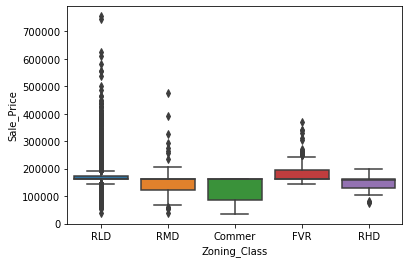

In [40]:
#Zoning Class and its impact on price of the property

sns.boxplot(y=df_num_var['Sale_Price'],x=df_cat_var['Zoning_Class']);plt.show()


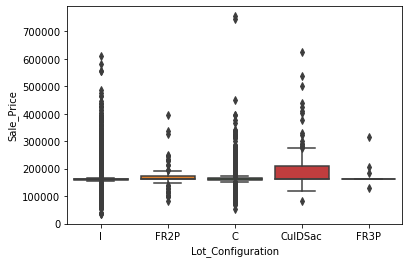

In [41]:
#Lot_Configuration

#Lot Configuration and its impact on price of the property

sns.boxplot(y=df_num_var['Sale_Price'],x=df_cat_var['Lot_Configuration']);plt.show()

In [42]:
#Automated Plotting using the for loop

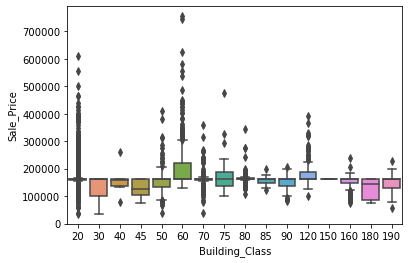

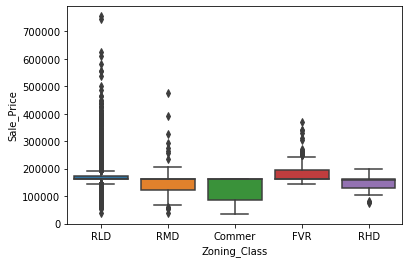

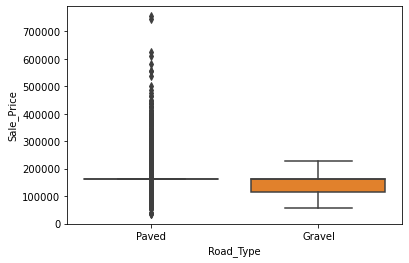

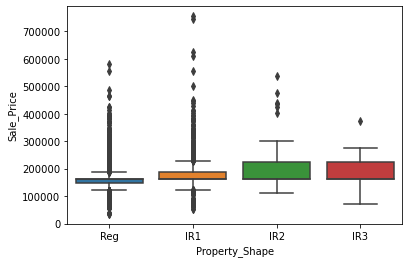

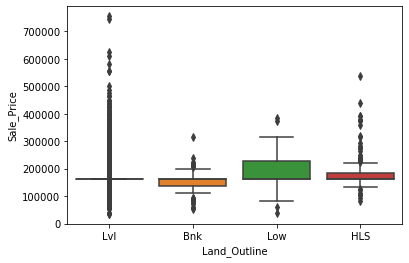

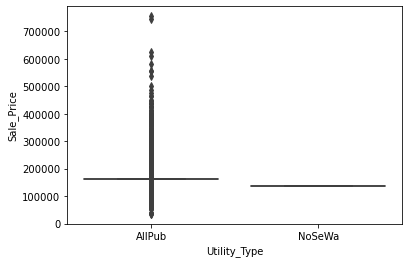

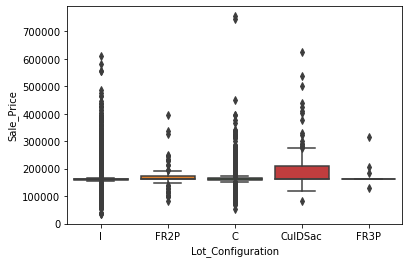

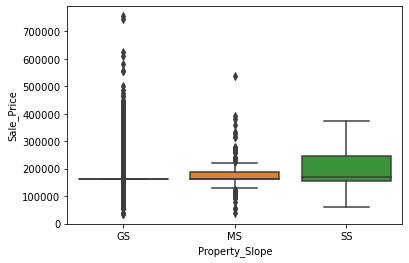

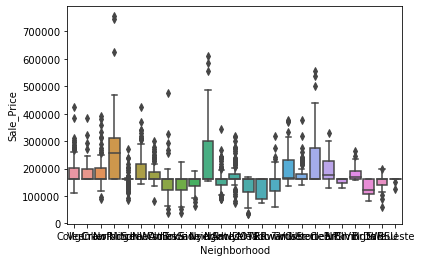

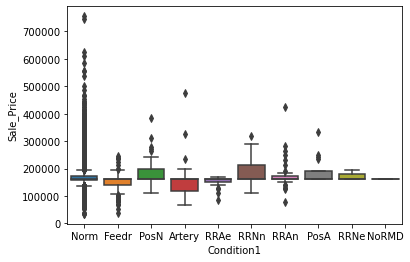

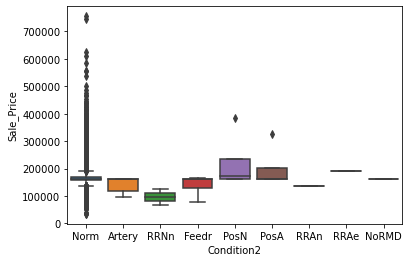

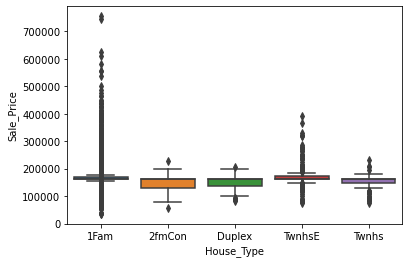

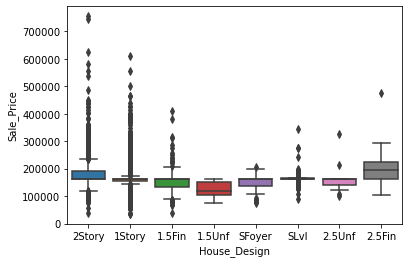

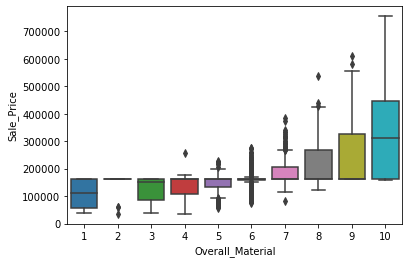

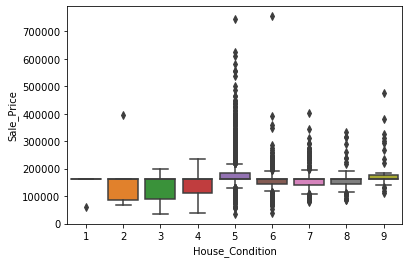

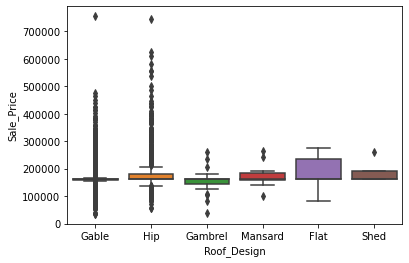

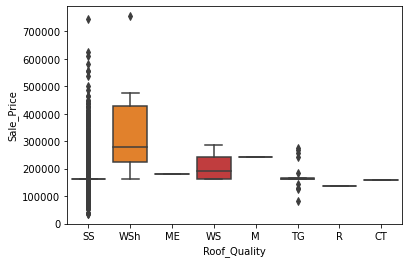

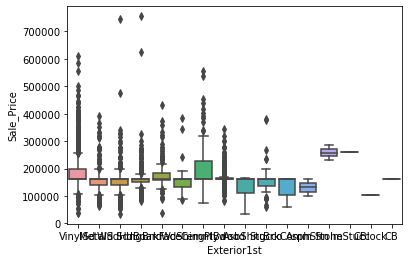

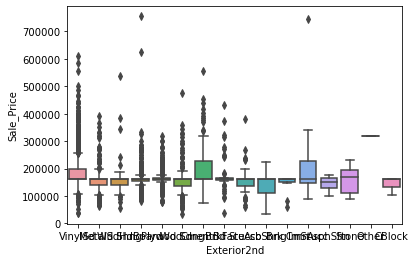

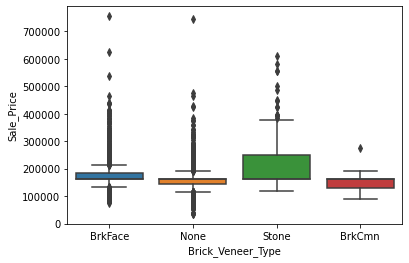

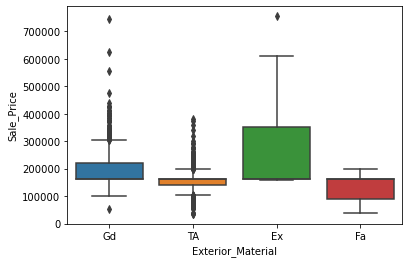

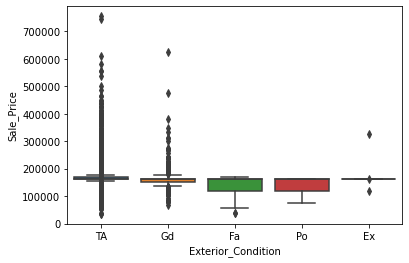

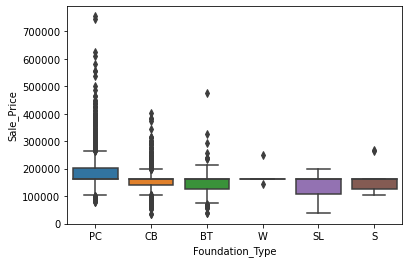

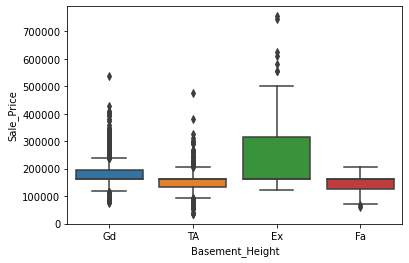

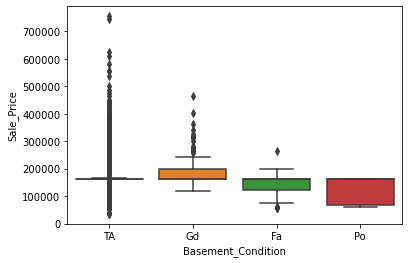

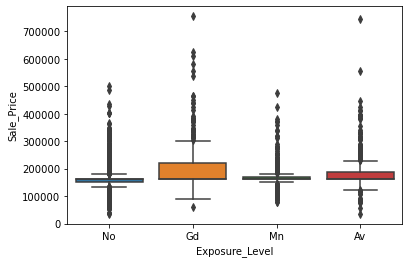

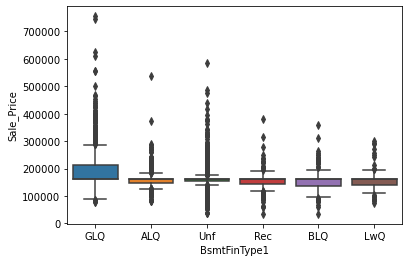

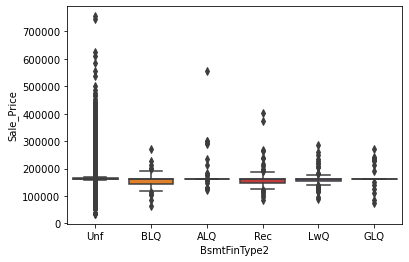

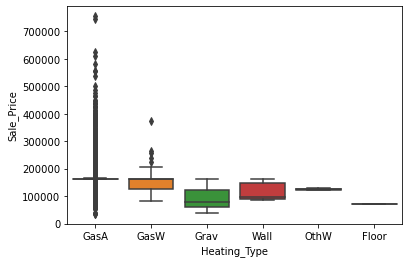

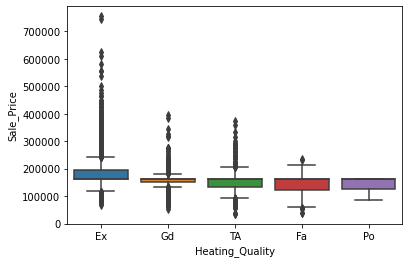

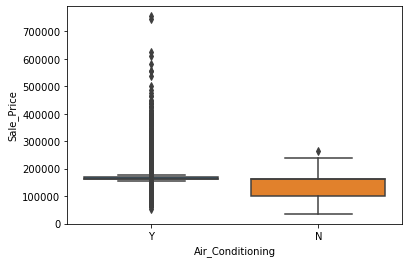

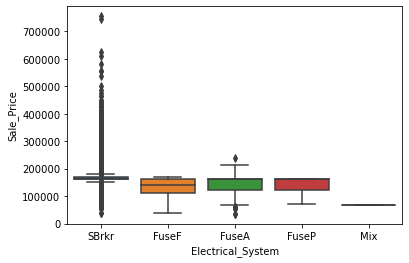

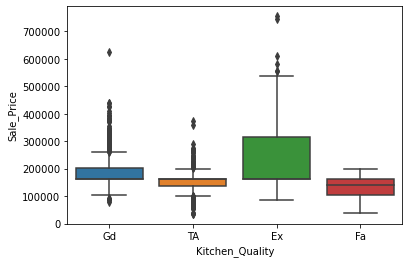

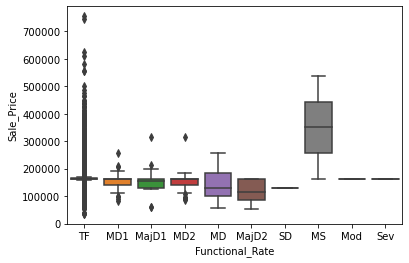

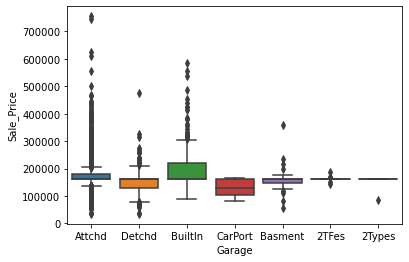

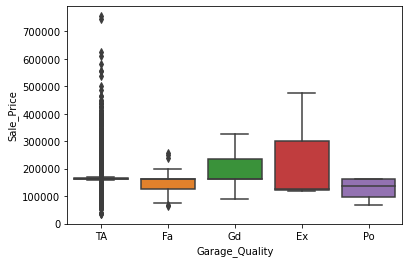

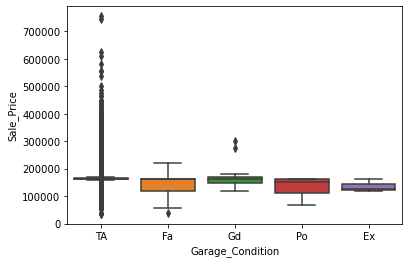

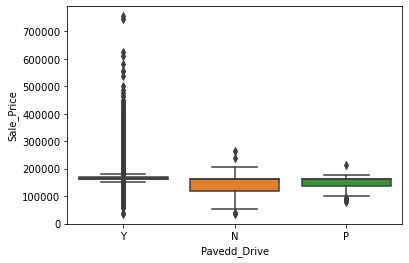

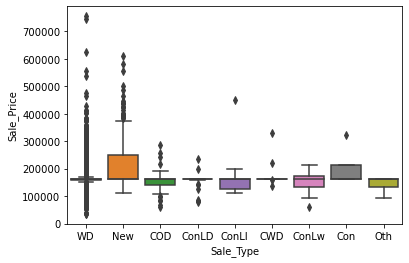

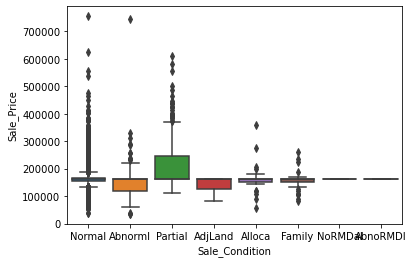

In [43]:
#we can also do a for loop and iterarte over the categorical variables to create multiple plots

from matplotlib.pyplot import figure
for i in df_cat_var.columns:
    figure()
    sns.boxplot(y=df_num_var['Sale_Price'],x=df_cat_var[i])

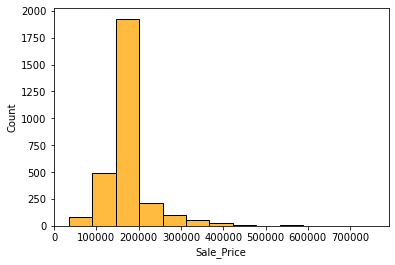

In [44]:
#Dependent variable

sns.histplot(df_num_var['Sale_Price'],color="orange");plt.show()

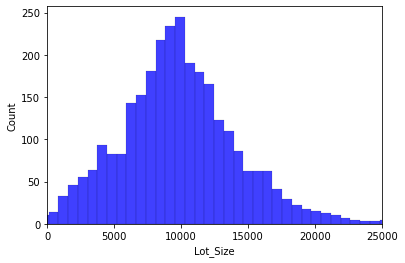

In [45]:
#input variables
sns.histplot(df_num_var['Lot_Size'],color="blue")

plt.xlim(0,25000);plt.show()

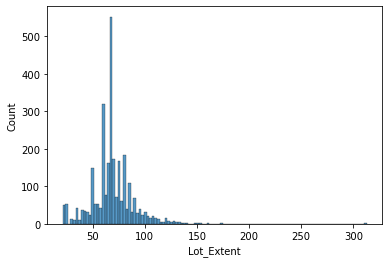

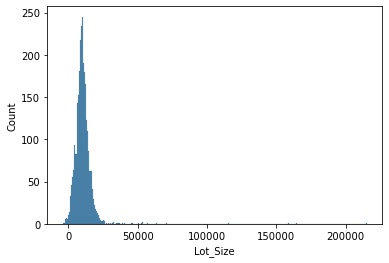

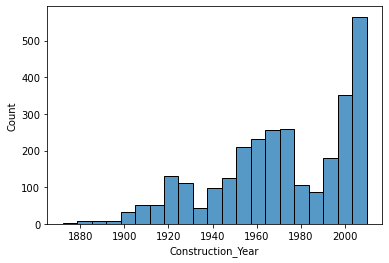

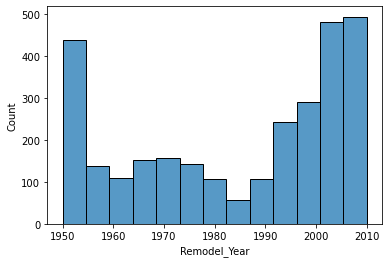

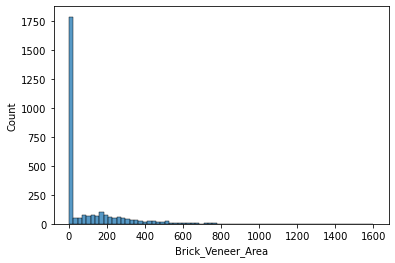

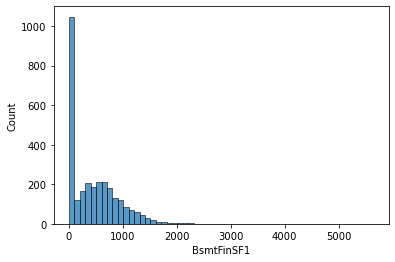

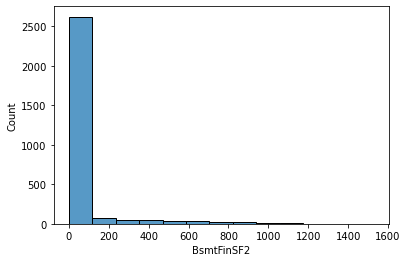

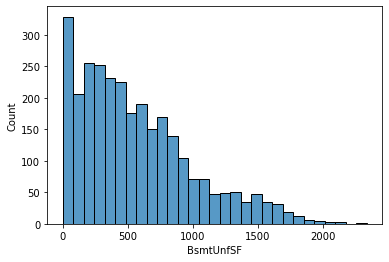

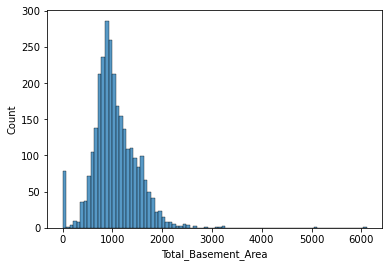

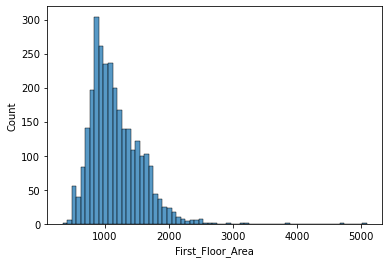

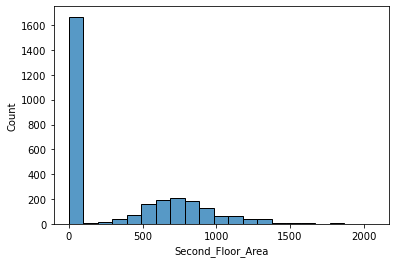

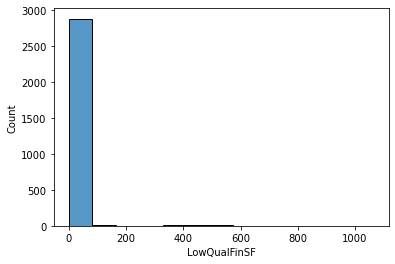

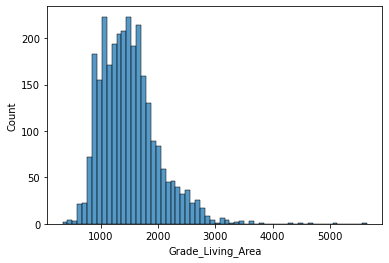

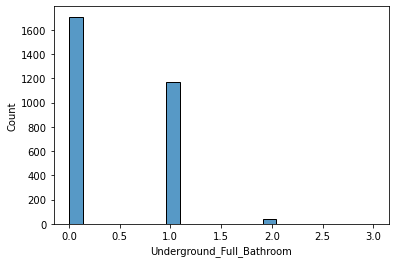

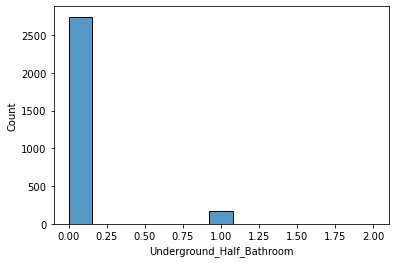

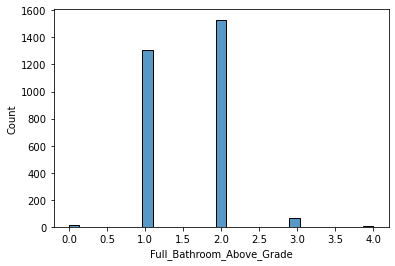

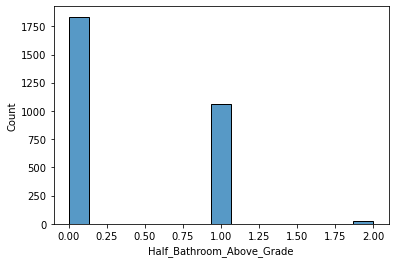

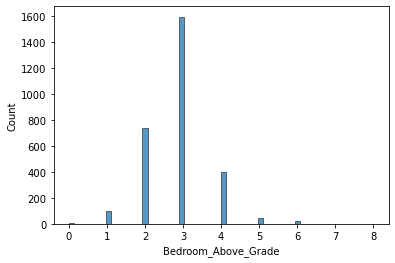

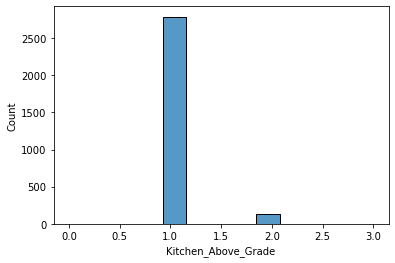

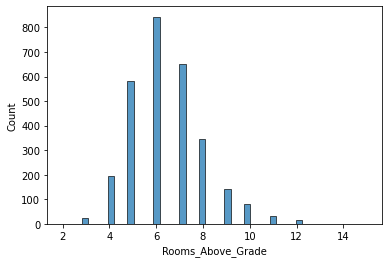

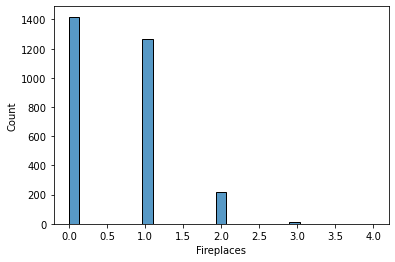

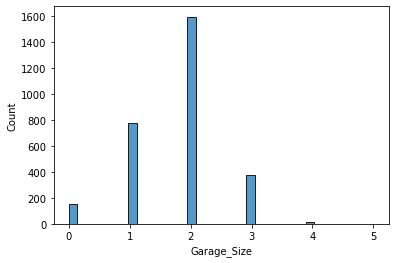

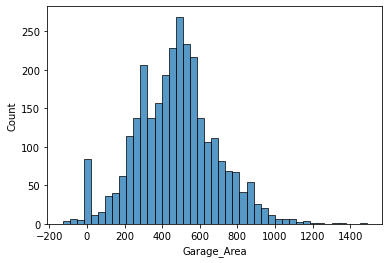

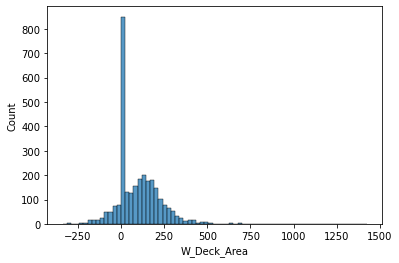

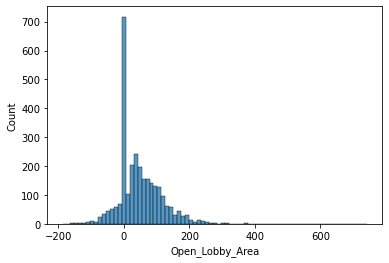

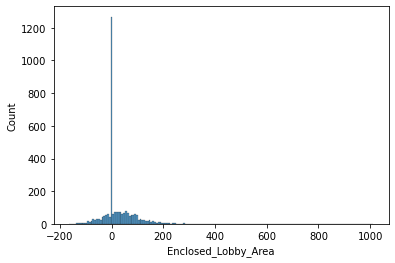

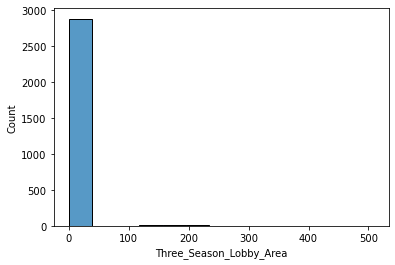

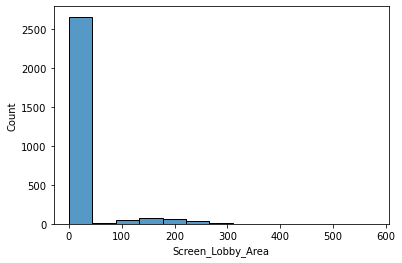

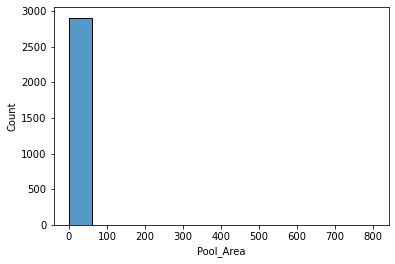

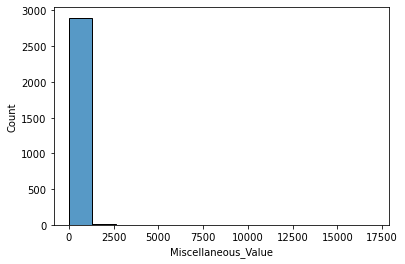

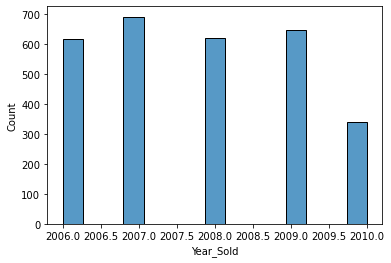

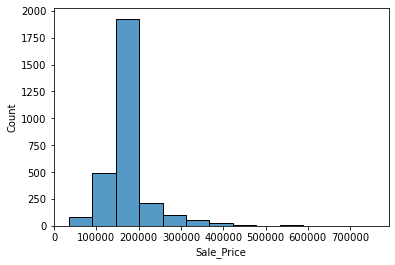

In [46]:
from matplotlib.pyplot import figure
for i in df_num_var.columns:
    figure()
    sns.histplot(df_num_var[i])

In [47]:
#2022-df_num_var.Construction_Year

df_num_var.describe()

,Lot_Extent,Lot_Size,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Year_Sold,Sale_Price
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,69.086361,10194.634957,1971.314942,1984.271076,101.430775,441.264907,49.482865,560.885538,1051.686086,1159.548663,...,471.853274,93.095222,48.062908,24.411772,2.603153,16.067855,2.252570,50.843386,2007.792666,171972.051405
std,21.321271,7888.702911,30.296408,20.894880,178.875378,455.556017,169.149510,439.476706,440.751562,392.425265,...,213.810047,126.257764,68.167925,64.346881,25.192440,56.193208,35.670034,567.498680,1.315184,56892.701938
min,21.000000,-4265.104479,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,60.000000,7134.500000,1953.250000,1965.000000,0.000000,0.000000,0.000000,220.250000,793.000000,876.000000,...,323.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,163000.000000
50%,68.000000,9600.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,...,477.000000,75.123594,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,78.000000,12342.000000,2001.000000,2004.000000,163.750000,733.000000,0.000000,805.500000,1302.000000,1387.750000,...,593.111494,173.183207,86.733331,50.325034,0.000000,0.000000,0.000000,0.000000,2009.000000,163000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,2010.000000,755000.000000


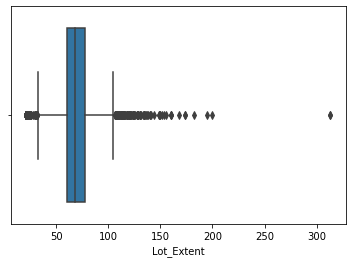

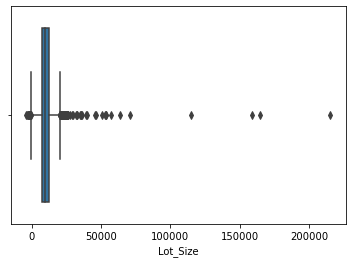

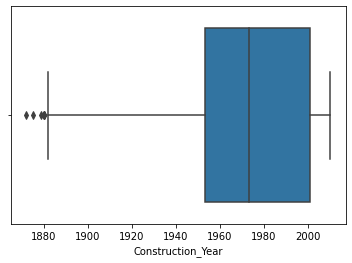

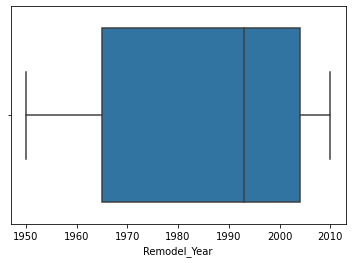

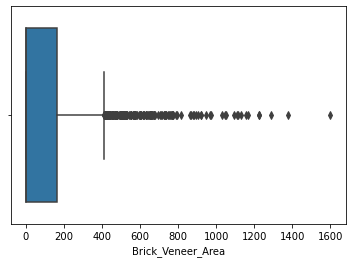

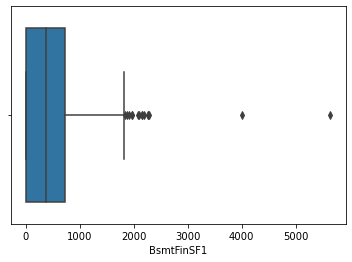

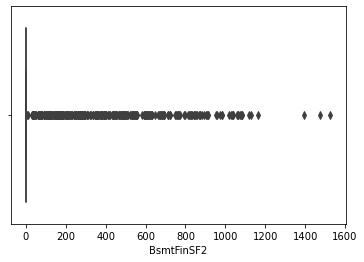

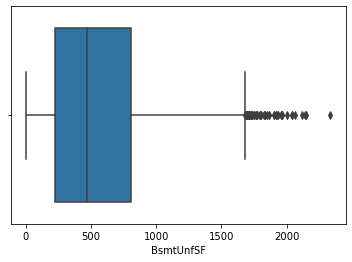

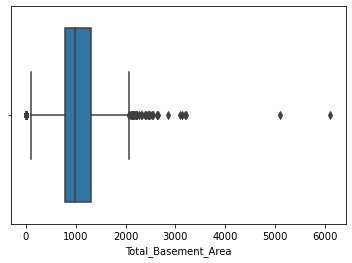

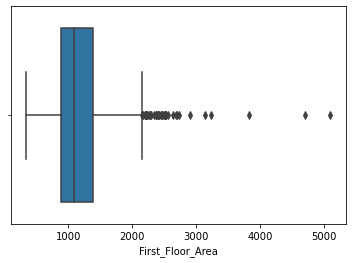

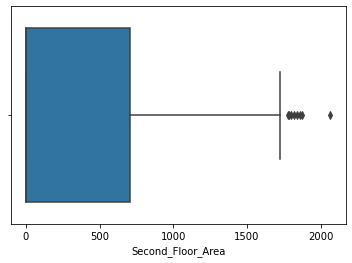

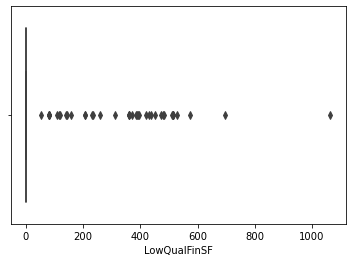

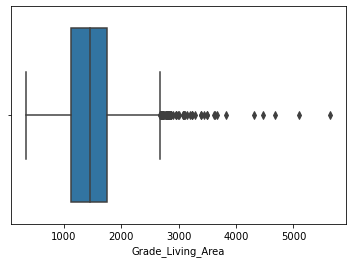

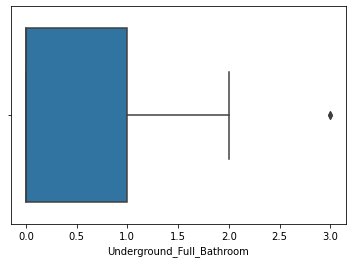

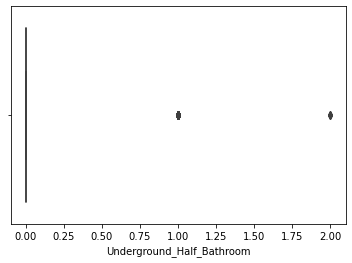

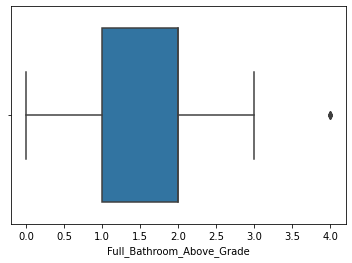

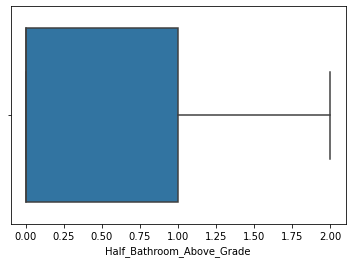

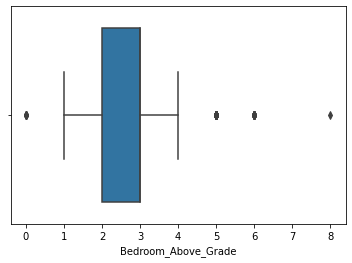

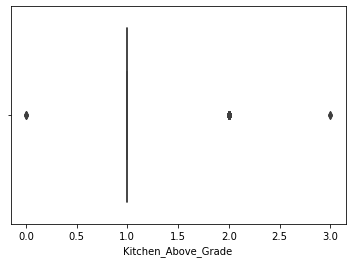

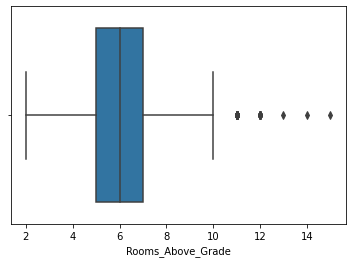

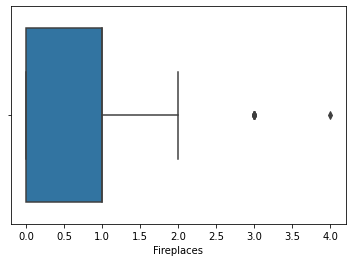

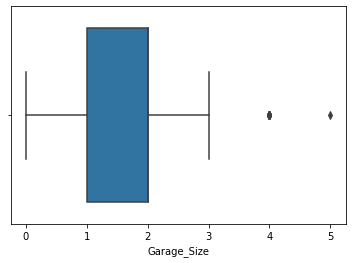

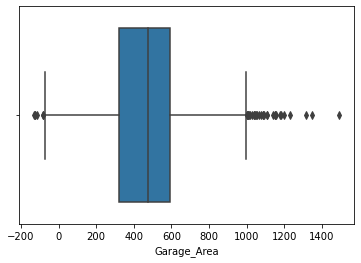

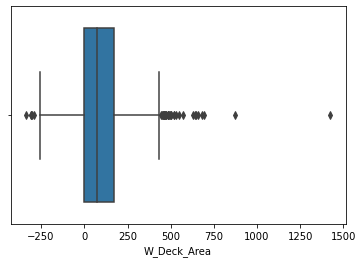

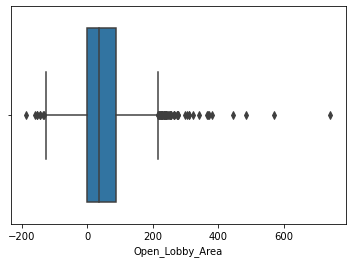

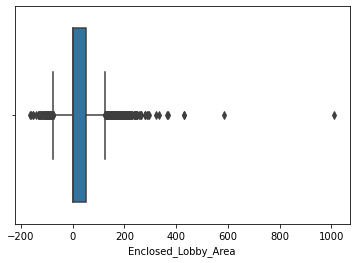

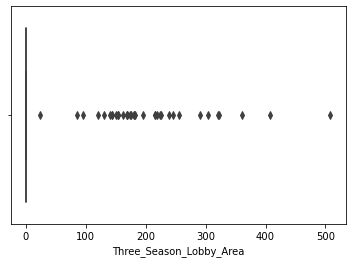

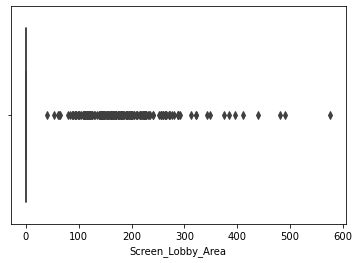

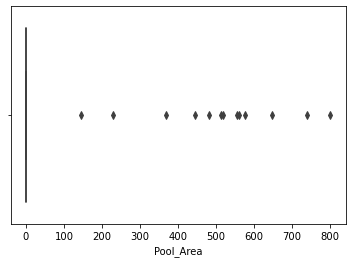

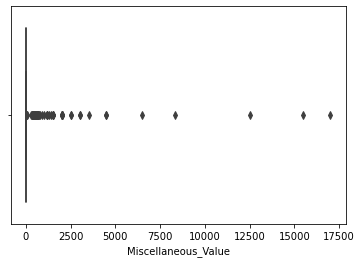

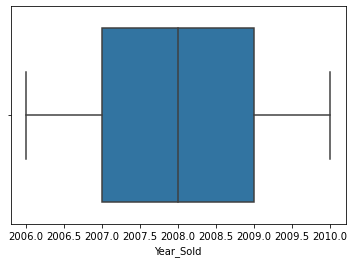

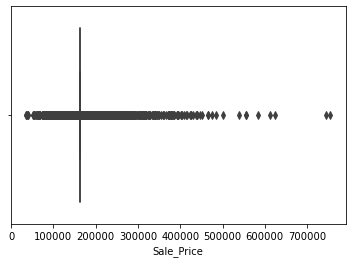

In [48]:
from matplotlib.pyplot import figure
for i in df_num_var.columns:
    figure()
    sns.boxplot(df_num_var[i])

# Bivariate analysis-correlation values and correlation heatmap

In [49]:
#df_num_var['Sale_Price']=df_num_var['Sale_Price']

In [50]:
#calculating correlation among numeric variable 
corr_matrix = df_num_var.corr() 

corr_matrix

,Lot_Extent,Lot_Size,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Year_Sold,Sale_Price
Lot_Extent,1.000000,0.195623,0.115521,0.086150,0.200542,0.201643,0.040209,0.107032,0.330737,0.423204,...,0.162107,0.085033,0.097533,0.001823,0.024892,0.069381,0.161033,0.035170,-0.007577,0.245967
Lot_Size,0.195623,1.000000,0.003665,0.013810,0.072783,0.133510,0.059746,0.004969,0.165761,0.182739,...,0.003154,0.017493,0.019099,-0.010909,0.016432,0.032404,0.051248,0.034173,-0.012377,0.239589
Construction_Year,0.115521,0.003665,1.000000,0.612262,0.307498,0.279690,-0.027415,0.130470,0.408556,0.310837,...,0.256839,0.122314,0.083116,-0.193412,0.015950,-0.041067,0.002300,-0.010893,-0.012333,0.363809
Remodel_Year,0.086150,0.013810,0.612262,1.000000,0.191528,0.152457,-0.061540,0.164962,0.298249,0.242361,...,0.200678,0.140248,0.101825,-0.133649,0.037406,-0.046976,-0.011429,-0.003153,0.033258,0.354341
Brick_Veneer_Area,0.200542,0.072783,0.307498,0.191528,1.000000,0.301648,-0.014309,0.087822,0.393788,0.392441,...,0.195538,0.093500,0.080068,-0.050294,0.014040,0.066341,0.004779,0.045141,-0.017624,0.334941
BsmtFinSF1,0.201643,0.133510,0.279690,0.152457,0.301648,1.000000,-0.055470,-0.477240,0.536422,0.458081,...,0.177721,0.140529,0.087820,-0.047148,0.050950,0.096934,0.084495,0.093338,0.022504,0.271105
BsmtFinSF2,0.040209,0.059746,-0.027415,-0.061540,-0.014309,-0.055470,1.000000,-0.237864,0.089231,0.084300,...,0.011214,0.069517,-0.018861,0.008263,-0.023226,0.063491,0.044576,-0.005088,0.008793,-0.010180
BsmtUnfSF,0.107032,0.004969,0.130470,0.164962,0.087822,-0.477240,-0.237864,1.000000,0.412525,0.296755,...,0.071656,-0.041763,0.037953,0.010242,-0.005838,-0.049239,-0.032294,-0.010517,-0.037980,0.152800
Total_Basement_Area,0.330737,0.165761,0.408556,0.298249,0.393788,0.536422,0.089231,0.412525,1.000000,0.801637,...,0.259335,0.130198,0.121290,-0.035394,0.037915,0.075425,0.072231,0.084023,-0.011217,0.428644
First_Floor_Area,0.423204,0.182739,0.310837,0.242361,0.392441,0.458081,0.084300,0.296755,0.801637,1.000000,...,0.253563,0.135182,0.149923,-0.023040,0.044095,0.098407,0.121907,0.093070,-0.013455,0.418103


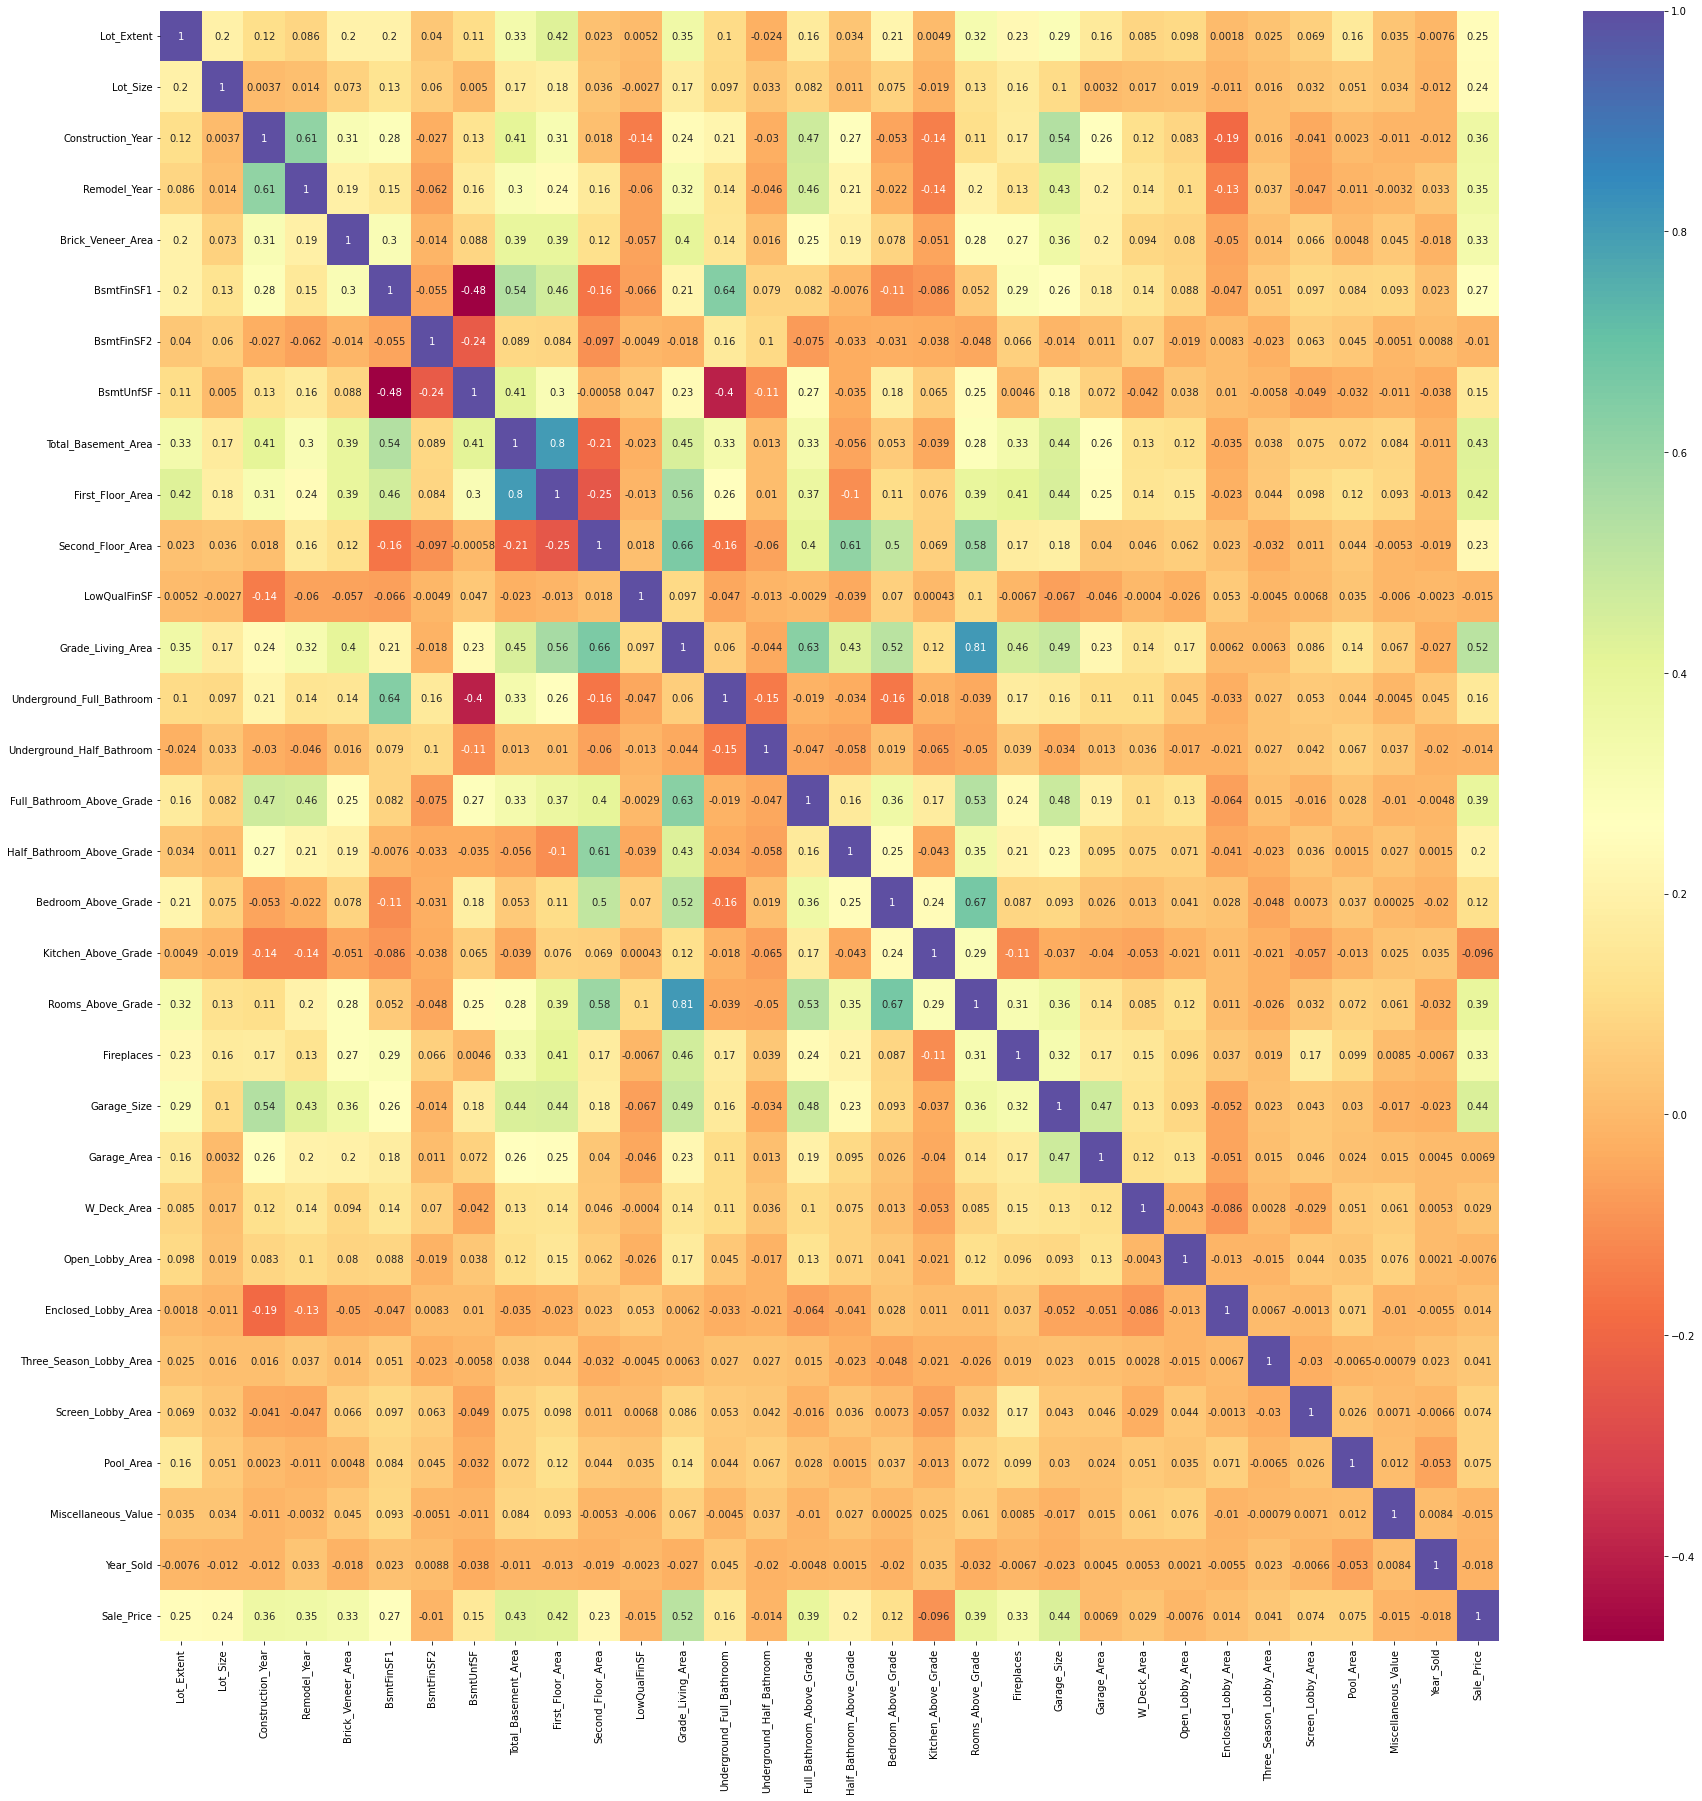

In [51]:
#calculating correlation among numeric variable 
#corr_matrix = train_num.corr() 

#filter correlation values above 0.5
#filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(30,30))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);
plt.savefig("C:\\Users\\kunal\\OneDrive\\Desktop\\Linear_Regression_Python\\Corr_heatmap")

In [52]:
df_num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lot_Extent                 2918 non-null   float64
 1   Lot_Size                   2918 non-null   float64
 2   Construction_Year          2918 non-null   int64  
 3   Remodel_Year               2918 non-null   int64  
 4   Brick_Veneer_Area          2918 non-null   float64
 5   BsmtFinSF1                 2918 non-null   float64
 6   BsmtFinSF2                 2918 non-null   float64
 7   BsmtUnfSF                  2918 non-null   float64
 8   Total_Basement_Area        2918 non-null   float64
 9   First_Floor_Area           2918 non-null   int64  
 10  Second_Floor_Area          2918 non-null   int64  
 11  LowQualFinSF               2918 non-null   int64  
 12  Grade_Living_Area          2918 non-null   int64  
 13  Underground_Full_Bathroom  2918 non-null   float

In [53]:
X = df_num_var.iloc[:,0:31];X.values


array([[   65.      ,  8450.      ,  2003.      , ...,     0.      ,
            0.      ,  2008.      ],
       [   80.      ,  9600.      ,  1976.      , ...,     0.      ,
            0.      ,  2007.      ],
       [   68.      , 11250.      ,  2001.      , ...,     0.      ,
            0.      ,  2008.      ],
       ...,
       [  160.      ,  7367.775348,  1960.      , ...,     0.      ,
            0.      ,  2006.      ],
       [   62.      ,  2203.135444,  1992.      , ...,     0.      ,
          700.      ,  2006.      ],
       [   74.      ,  6253.431852,  1993.      , ...,     0.      ,
            0.      ,  2006.      ]])

# Check for multicollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
  
     # the independent variables set
x = df_num_var.iloc[:,0:31]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(len(x.columns))]
print(vif_data)

                      feature           VIF
0                  Lot_Extent  1.569823e+01
1                    Lot_Size  2.908739e+00
2           Construction_Year  1.160435e+04
3                Remodel_Year  1.700399e+04
4           Brick_Veneer_Area  1.831267e+00
5                  BsmtFinSF1  4.976684e+04
6                  BsmtFinSF2  3.842272e+03
7                   BsmtUnfSF  6.280467e+04
8         Total_Basement_Area  1.608055e+05
9            First_Floor_Area           inf
10          Second_Floor_Area           inf
11               LowQualFinSF           inf
12          Grade_Living_Area           inf
13  Underground_Full_Bathroom  3.522542e+00
14  Underground_Half_Bathroom  1.226549e+00
15  Full_Bathroom_Above_Grade  2.458079e+01
16  Half_Bathroom_Above_Grade  3.352904e+00
17        Bedroom_Above_Grade  2.838039e+01
18        Kitchen_Above_Grade  3.339293e+01
19          Rooms_Above_Grade  7.752929e+01
20                 Fireplaces  2.781147e+00
21                Garage_Size  1

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# the independent variables set
x = df_num_var.iloc[:,0:31]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(len(x.columns))]
print(vif_data)

                      feature           VIF
0                  Lot_Extent  1.569823e+01
1                    Lot_Size  2.908739e+00
2           Construction_Year  1.160435e+04
3                Remodel_Year  1.700399e+04
4           Brick_Veneer_Area  1.831267e+00
5                  BsmtFinSF1  4.976684e+04
6                  BsmtFinSF2  3.842272e+03
7                   BsmtUnfSF  6.280467e+04
8         Total_Basement_Area  1.608055e+05
9            First_Floor_Area           inf
10          Second_Floor_Area           inf
11               LowQualFinSF           inf
12          Grade_Living_Area           inf
13  Underground_Full_Bathroom  3.522542e+00
14  Underground_Half_Bathroom  1.226549e+00
15  Full_Bathroom_Above_Grade  2.458079e+01
16  Half_Bathroom_Above_Grade  3.352904e+00
17        Bedroom_Above_Grade  2.838039e+01
18        Kitchen_Above_Grade  3.339293e+01
19          Rooms_Above_Grade  7.752929e+01
20                 Fireplaces  2.781147e+00
21                Garage_Size  1

In [56]:
vif_data[(vif_data['VIF']>5)]

,feature,VIF
0,Lot_Extent,1.569823e+01
2,Construction_Year,1.160435e+04
3,Remodel_Year,1.700399e+04
5,BsmtFinSF1,4.976684e+04
6,BsmtFinSF2,3.842272e+03
7,BsmtUnfSF,6.280467e+04
8,Total_Basement_Area,1.608055e+05
9,First_Floor_Area,inf
10,Second_Floor_Area,inf
11,LowQualFinSF,inf


In [57]:
#sns.pairplot(df_num_var.iloc[:,1:5], diag_kind="kde");plt.show()

In [58]:
df_cat_var=pd.get_dummies(df_cat_var,drop_first=True)

In [60]:
df_cat_var.head()

,Overall_Material,House_Condition,Building_Class_30,Building_Class_40,Building_Class_45,Building_Class_50,Building_Class_60,Building_Class_70,Building_Class_75,Building_Class_80,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_NoRMDal,Sale_Condition_Normal,Sale_Condition_Partial
0,7,5,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,6,8,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,7,5,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,7,5,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
4,8,5,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#calculating correlation among numeric variable 
#cat_corr_matrix = df_cat_var.corr(method='spearman') 

#cat_corr_matrix>.50

#plot correlation matrix
#plt.figure(figsize=(30,30))

#sns.heatmap(cat_corr_matrix,cmap='Spectral',annot=True);
#plt.savefig("C:\\Users\\kunal\\OneDrive\\Desktop\\Linear_Regression_Python\\Cat_Corr_heatmap")

In [61]:
#Now we are merging the df_num_var and df_cat_var

df_combined=pd.concat([df_num_var,df_cat_var],axis=1);df_combined.shape

(2918, 252)

In [62]:
from statsmodels.api import add_constant

df_combined=add_constant(df_combined)

In [63]:
df_combined.head()

,const,Lot_Extent,Lot_Size,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_NoRMDal,Sale_Condition_Normal,Sale_Condition_Partial
0,1.0,65.0,8450.0,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,1,0,0,0,0,0,1,0
1,1.0,80.0,9600.0,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,68.0,11250.0,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,1,0,0,0,0,0,1,0
3,1.0,60.0,9550.0,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,1,1,0,0,0,0,0,0
4,1.0,84.0,14260.0,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,1,0,0,0,0,0,1,0


In [64]:
train_df=df_combined.iloc[0:1459,:]
test_df=df_combined.iloc[1459:,:]

In [65]:
#we need to split df_train into input and output

# create feature and response varibles
X = train_df.drop(['Sale_Price'], axis=1)
Y = train_df['Sale_Price']

In [68]:
# create feature and response variable set
# we create train and test sample from our dataset

from sklearn.model_selection import train_test_split #similar to sample.split function of caTools package

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1,random_state=123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1313, 252) (146, 252) (1313,) (146,)


In [73]:
y_test.head(10)

147     222500.0
676      87000.0
1304    130000.0
1372    274300.0
1426    271000.0
1127    259000.0
35      309000.0
954     127500.0
1296    155000.0
613     147000.0
Name: Sale_Price, dtype: float64

In [69]:
from statsmodels.api import OLS

model_definition=OLS(y_train,x_train)

model_building=model_definition.fit()

print(model_building.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     60.84
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:05:57   Log-Likelihood:                -14922.
No. Observations:                1313   AIC:                         3.032e+04
Df Residuals:                    1076   BIC:                         3.155e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
import statsmodels.api as sm
model_building_resid=model_building.resid
#probplot=sm.ProbPlot(model_building_resid)
#plt.figure(figsize=(8,6))
#probplot.ppplot(line='45')

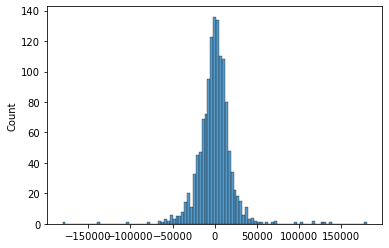

In [76]:
#Normality of errors
sns.histplot(model_building_resid);plt.show()

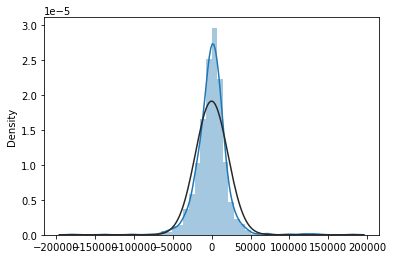

In [77]:
from scipy import stats
sns.distplot(model_building.resid, fit=stats.norm);plt.show()

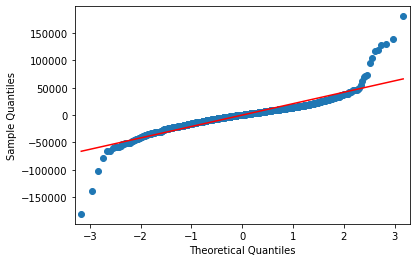

In [78]:
sm.qqplot(model_building.resid, line='s');

In [81]:
model_building.fittedvalues

302     199839.276263
767     149172.041437
429     191819.922140
1139    125296.074212
558     205688.922443
            ...      
1041    163066.532152
1122     85919.903965
1346    270398.729084
1406    130085.867057
1389    128192.513383
Length: 1313, dtype: float64

In [79]:
#Test of Homoscedasticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

Text(0, 0.5, 'Standardised Residuals')

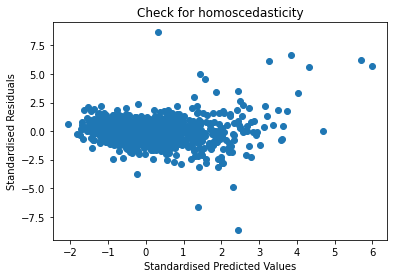

In [80]:
plt.scatter(get_standardized_values(model_building.fittedvalues),get_standardized_values(model_building.resid))

plt.title("Check for homoscedasticity")
plt.xlabel("Standardised Predicted Values")
plt.ylabel("Standardised Residuals")

# Breush Pagan Test check for Hetreroscedasticity

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sm


#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.het_breuschpagan(model_building.resid, model_building.model.exog)

lzip(names, test)

In [ ]:
#Cooks distance
model_building_infl=model_building.get_influence()
(c,p)=model_building_infl.cooks_distance

plt.stem(np.arange(len(x_train)),np.round(c,3),markerfmt=",")

plt.title("Cooks distance plot")

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax=plt.subplots(figsize=(8,6))
influence_plot(model_building,ax=ax)
plt.title("Influential Points")
plt.show()

In [ ]:
#fig=sm.graphics.influence_plot(model_building,criterion="cooks")
#fig.tight_layout(pad=1.0)

In [ ]:
pred_test = model_building.predict(x_test);pred_test

In [ ]:
# we check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
print(rmse)

# Removal of outliers

In [ ]:
#Removal of outliers

sns.boxplot(df_combined['Sale_Price']);plt.show()

In [ ]:
df_combined['Sale_Price'].describe()

In [ ]:
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df_combined['Sale_Price']))
print(z)

In [ ]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))

In [ ]:
new_df=df_combined.drop([  58,  178,  185,  349,  389,  440,  473,  496,  527,  591,  664,
        691,  769,  798,  803,  898, 1046, 1142, 1169, 1182, 1243, 1373])

In [ ]:
new_df.shape

In [ ]:
#Recreate the model 

#we need to split df_combibed into input and output

# create feature and response varibles
X = new_df.drop(['Sale_Price'], axis=1)
Y = new_df['Sale_Price']


In [ ]:
# create feature and response variable set
# we create train and test sample from our dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1,random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
from statsmodels.api import OLS

model_definition=OLS(y_train,x_train)

model_building_1=model_definition.fit()

print(model_building_1.summary())

In [ ]:
test_df.head()

In [ ]:
test_df=test_df.drop('Sale_Price',axis=1)

In [ ]:
pred_test_1 = model_building_1.predict(test_df);pred_test_1